<a href="https://colab.research.google.com/github/charu1605/UppercasePerformanceTest/blob/main/time_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# install necessary compilers
!apt update
!apt install gcc g++ openjdk-11-jdk r-base -y

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,315 kB]
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,674 kB]
Get:13 https://r2u.stat.illinois.edu/ubuntu jammy/

## **Generate Large Text Files**

In [2]:
import os
import random
import string

def generate_text_file(filename, size_mb):
    size_bytes = size_mb * 1024 * 1024
    chars = string.ascii_lowercase + " \n"
    with open(filename, "w") as f:
        while os.path.getsize(filename) < size_bytes:
            f.write(''.join(random.choices(chars, k=100)) + '\n')

# Generate files
for size in [200, 400, 600, 800, 1000]:
    generate_text_file(f"text_{size}MB.txt", size)

print("Text files generated successfully!")


Text files generated successfully!


# **write uppercase programms**

**1. C language**

In [3]:
%%writefile uppercase.c
#include <stdio.h>
#include <ctype.h>

int main(int argc, char *argv[]) {
    if (argc != 3) {
        printf("Usage: %s input_file output_file\n", argv[0]);
        return 1;
    }

    FILE *input = fopen(argv[1], "r");
    FILE *output = fopen(argv[2], "w");

    if (!input || !output) {
        printf("File error!\n");
        return 1;
    }

    int ch;
    while ((ch = fgetc(input)) != EOF) {
        fputc(toupper(ch), output);
    }

    fclose(input);
    fclose(output);
    return 0;
}


Writing uppercase.c


In [4]:
!gcc uppercase.c -o uppercase


**2. C++ language**

In [5]:
%%writefile uppercase.cpp
#include <iostream>
#include <fstream>
#include <cctype>

int main(int argc, char *argv[]) {
    if (argc != 3) {
        std::cerr << "Usage: " << argv[0] << " input_file output_file\n";
        return 1;
    }

    std::ifstream input(argv[1]);
    std::ofstream output(argv[2]);

    if (!input || !output) {
        std::cerr << "File error!\n";
        return 1;
    }

    char ch;
    while (input.get(ch)) {
        output.put(std::toupper(ch));
    }

    return 0;
}


Writing uppercase.cpp


In [6]:
!g++ uppercase.cpp -o uppercase_cpp


**3. JAVA language**

In [7]:
%%writefile Uppercase.java
import java.io.*;

public class Uppercase {
    public static void main(String[] args) throws IOException {
        if (args.length != 2) {
            System.out.println("Usage: java Uppercase input_file output_file");
            return;
        }

        BufferedReader reader = new BufferedReader(new FileReader(args[0]));
        BufferedWriter writer = new BufferedWriter(new FileWriter(args[1]));

        int ch;
        while ((ch = reader.read()) != -1) {
            writer.write(Character.toUpperCase(ch));
        }

        reader.close();
        writer.close();
    }
}


Writing Uppercase.java


In [8]:
!javac Uppercase.java


**4. R language**

In [9]:
%%writefile uppercase.R
args <- commandArgs(trailingOnly=TRUE)
if (length(args) != 2) {
  stop("Usage: Rscript uppercase.R input_file output_file")
}

input_file <- args[1]
output_file <- args[2]

text <- readLines(input_file, warn=FALSE)
text_upper <- toupper(text)
writeLines(text_upper, output_file)


Writing uppercase.R


**5. python**

In [10]:
%%writefile uppercase.py
import sys

if len(sys.argv) != 3:
    print("Usage: python uppercase.py input_file output_file")
    sys.exit(1)

input_file, output_file = sys.argv[1], sys.argv[2]

with open(input_file, "r") as infile, open(output_file, "w") as outfile:
    for line in infile:
        outfile.write(line.upper())


Writing uppercase.py


# **execution time**

In [11]:
import time
import subprocess

languages = {
    "C": "./uppercase",
    "C++": "./uppercase_cpp",
    "Java": "java Uppercase",
    "R": "Rscript uppercase.R",
    "Python": "python3 uppercase.py"
}

file_sizes = [200, 400, 600, 800, 1000]
results = {}

for lang, command in languages.items():
    times = []
    for size in file_sizes:
        input_file = f"text_{size}MB.txt"
        output_file = f"output_{lang.lower()}.txt"

        start = time.time()
        subprocess.run(f"{command} {input_file} {output_file}", shell=True)
        end = time.time()

        times.append(end - start)
    results[lang] = times

# Print results
for lang, times in results.items():
    print(f"{lang}: {times}")


C: [3.104829788208008, 6.946867227554321, 9.577927350997925, 13.43867039680481, 13.47193169593811]
C++: [6.877387046813965, 12.341998100280762, 18.932940244674683, 22.5864577293396, 31.093242645263672]
Java: [4.375482797622681, 10.39140796661377, 12.4835205078125, 43.29428577423096, 21.936685800552368]
R: [69.99901723861694, 158.34451603889465, 222.67791771888733, 338.59291219711304, 451.9849510192871]
Python: [5.123318672180176, 8.120563268661499, 13.001654624938965, 17.714585304260254, 19.195223331451416]


In [14]:
import pandas as pd
df = pd.DataFrame(results)

# Display DataFrame
df

,C,C++,Java,R,Python
0,3.104830,6.877387,4.375483,69.999017,5.123319
1,6.946867,12.341998,10.391408,158.344516,8.120563
2,9.577927,18.932940,12.483521,222.677918,13.001655
3,13.438670,22.586458,43.294286,338.592912,17.714585
4,13.471932,31.093243,21.936686,451.984951,19.195223


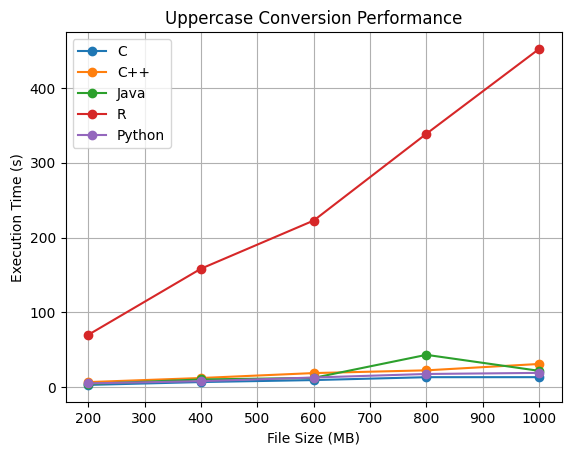

In [12]:
import matplotlib.pyplot as plt

for lang, times in results.items():
    plt.plot(file_sizes, times, marker="o", label=lang)

plt.xlabel("File Size (MB)")
plt.ylabel("Execution Time (s)")
plt.title("Uppercase Conversion Performance")
plt.legend()
plt.grid()
plt.show()
